## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
#!pip install yellowbrick
#from math import abs

## Reading the data

In [2]:
df=pd.read_excel("cali_housing.xlsx")

## Exploratory Data Analysis

In [3]:
df.head() # returns first five rows of data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [4]:
df.info() # returns basic information of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [5]:
df.describe() # returns statistical parameters of all columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Checking for Missing Values in dataset

In [6]:
df.isnull().sum()# Checking for any null values present in the data

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

**There are no null values or missing values in the dataset**

In [7]:
df.corr() # returns correlation between all columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


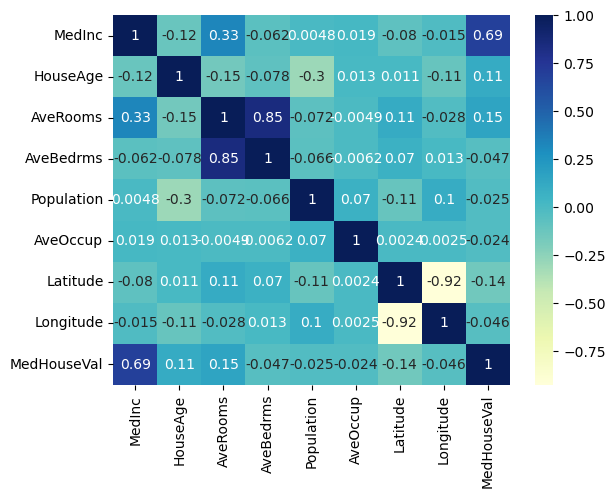

In [8]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) # Heatmap for visualizing correlation

## Scatter Plots. Feautures vs Target Variable

**Median Income vs Median House Value**

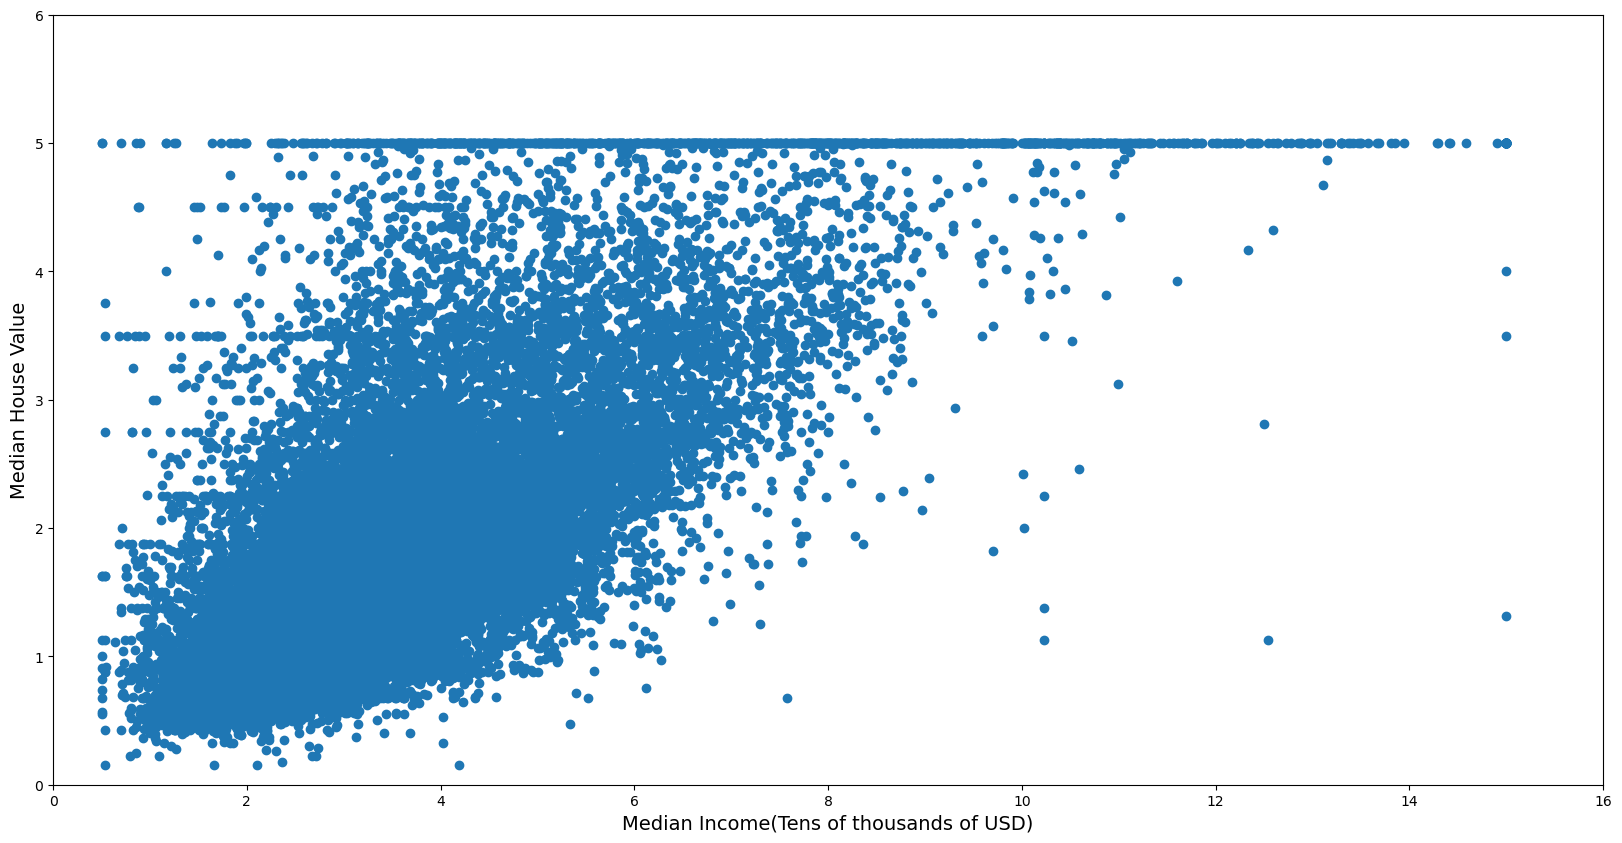

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(df.MedInc, df.MedHouseVal)
plt.axis([0,16, 0, 6])
plt.xlabel('Median Income(Tens of thousands of USD)', fontsize=14)
plt.ylabel('Median House Value', fontsize=14);

### House Age vs Med House Value

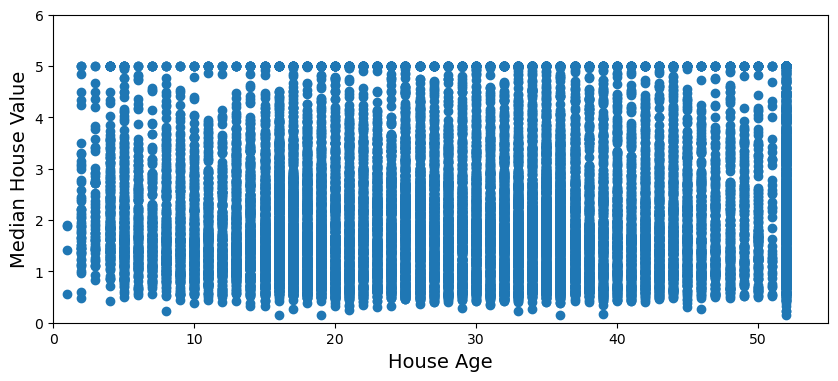

In [10]:
plt.figure(figsize=(10,4))
plt.scatter(df.HouseAge, df.MedHouseVal)
plt.axis([0, 55, 0, 6])
plt.xlabel('House Age', fontsize=14)
plt.ylabel('Median House Value', fontsize=14);

### Latitude vs Med House Value

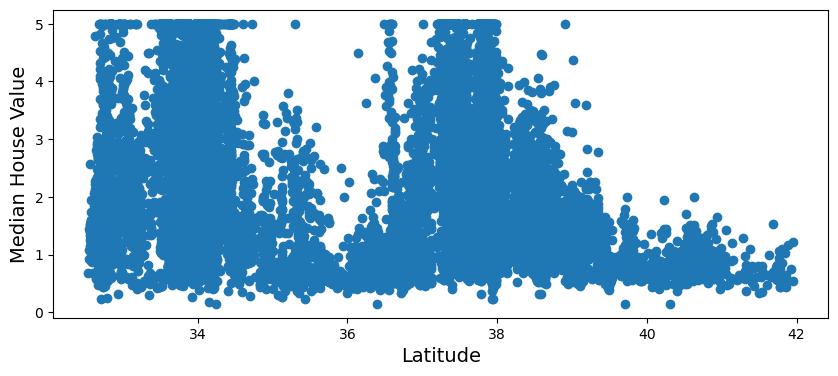

In [11]:
plt.figure(figsize=(10,4))
plt.scatter(df.Latitude, df.MedHouseVal)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Median House Value', fontsize=14);

<Figure size 640x480 with 0 Axes>

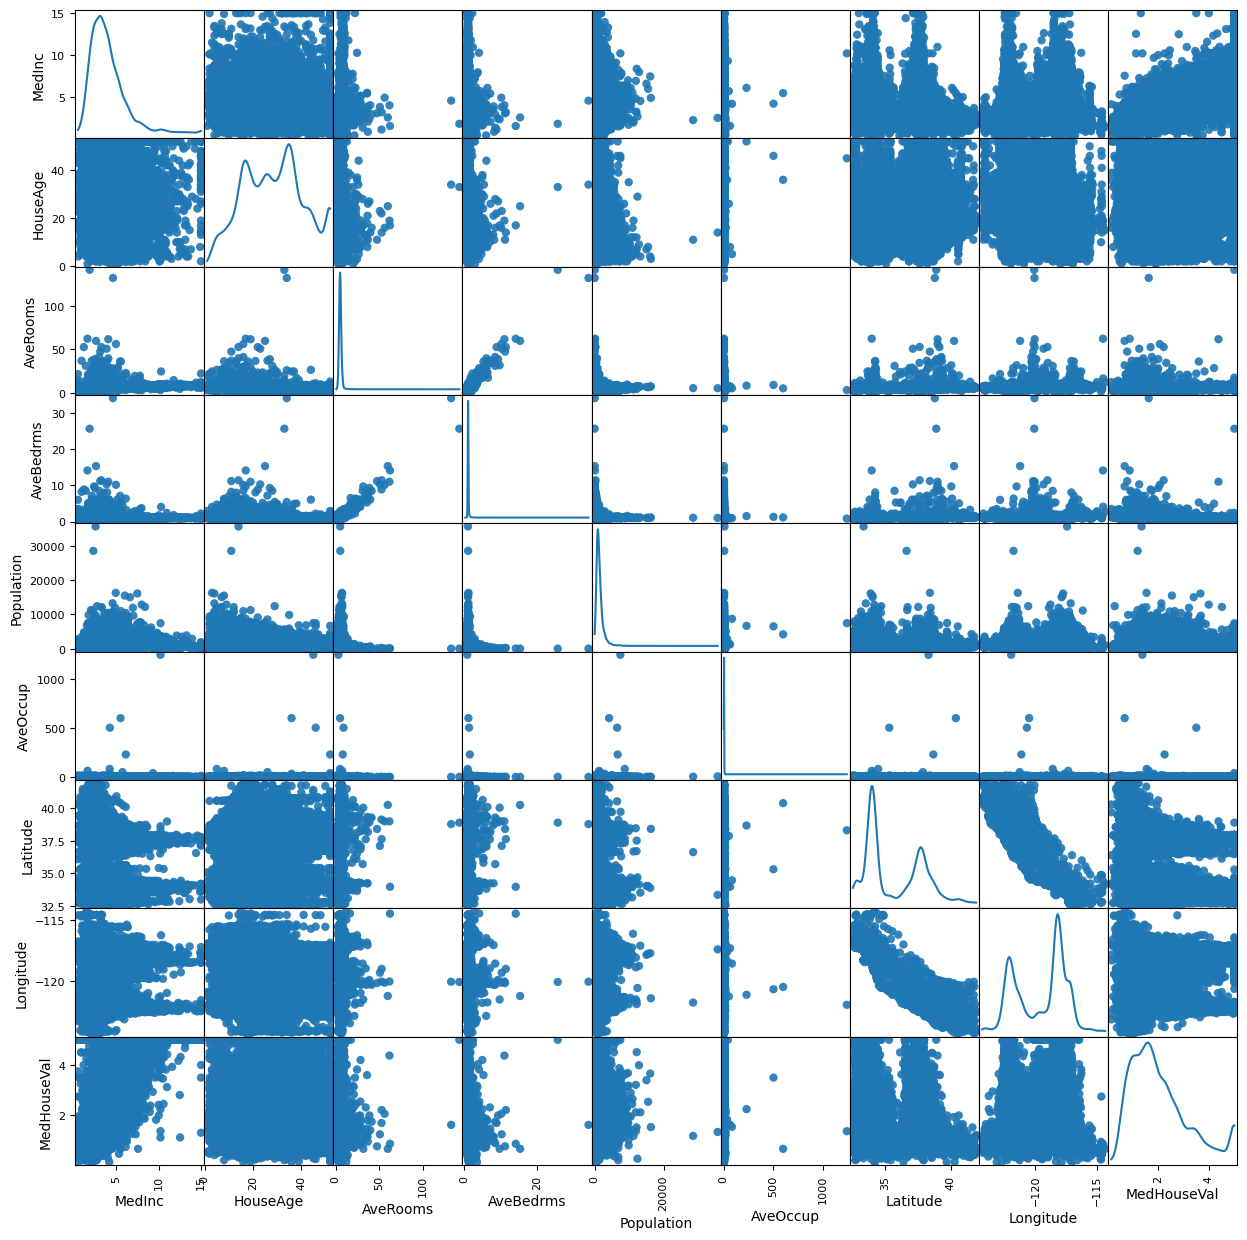

In [12]:
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(df,figsize =(15,15),alpha=0.9,diagonal="kde",marker="o");

In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

## From scatter plots and correlation between all features and Median House Value, only Median Income looks promising.So I am selecting only one feature to reduce complexity of model

In [14]:
# Selecting Features for Decision Tree
x=df[['MedInc']]
#x.reshape(-1,1)
# Seperating Target variable
y=df['MedHouseVal']
#y.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True)

In [16]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from yellowbrick.regressor import PredictionError
#from sklearn.tree import export_graph_viz

## DT Regressor Model 1 with MedInc as feature and default parameters

### Model

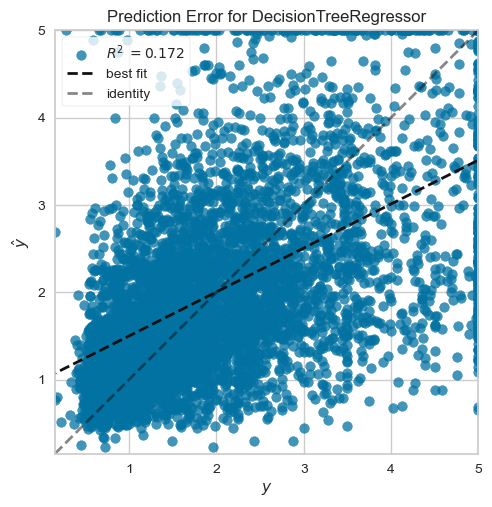

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
DT1 = DecisionTreeRegressor(random_state=42,splitter='best',min_samples_split=2)
DT1.fit(X_train, y_train)
y_predicted_DT1 = DT1.predict(X_test)
plot=PredictionError(DT1)
plot.fit(X_train,y_train)
plot.score(X_test,y_test)
plot.poof()

In [57]:
#plt.figure(figsize=(15,10))
#tree.plot_tree(DT1,fontsize=14);

### Errors

In [19]:
print("Mean Squared Error for DT1 is:",metrics.mean_squared_error(y_test, DT1.predict(X_test)))
print("Mean Absolute Error for DT1 is:",metrics.mean_absolute_error(y_test, DT1.predict(X_test)))
print("Root Mean Squared Error for DT1 is:",sqrt(metrics.mean_squared_error(y_test, DT1.predict(X_test))))

Mean Squared Error for DT1 is: 1.1656047720480704
Mean Absolute Error for DT1 is: 0.7870478619690086
Root Mean Squared Error for DT1 is: 1.0796317761385454


### Error Plots. Predicted vs Actual

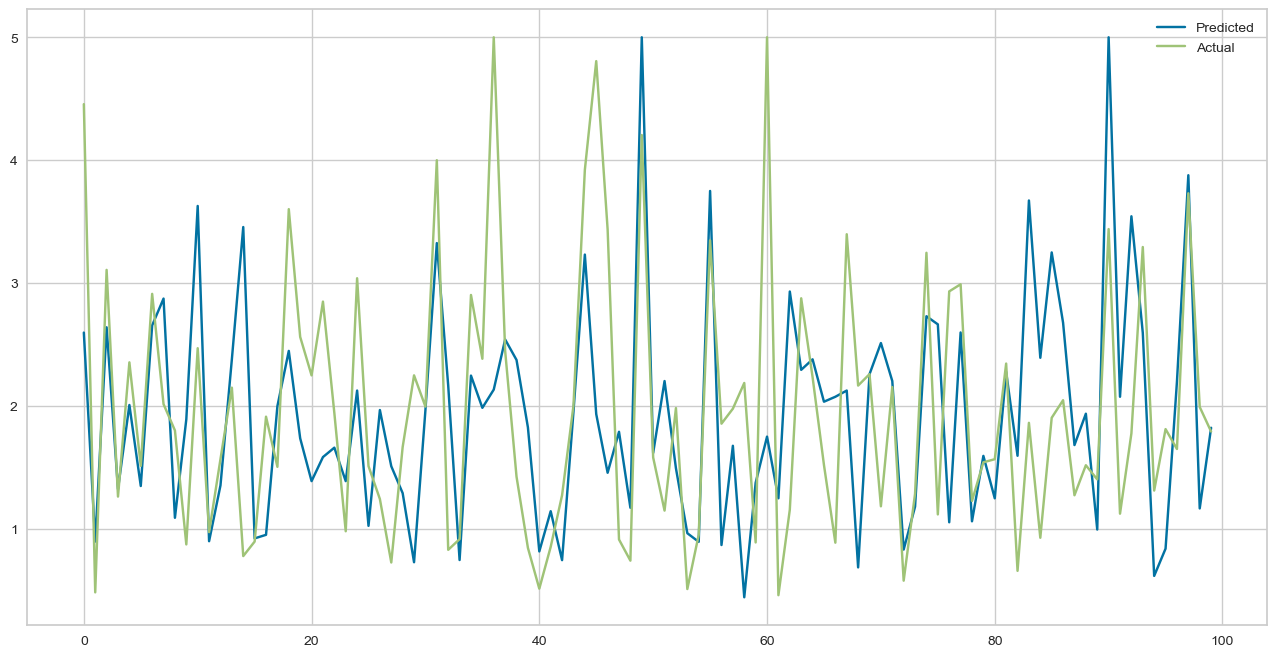

In [20]:
error=abs(y_predicted_DT1-y_test)
errors_data = pd.DataFrame({'Predicted':y_predicted_DT1,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
errors_data = errors_data.reset_index()
errors_data = errors_data.drop(['index'],axis=1)
plt.plot(errors_data[:100])
plt.legend(['Predicted','Actual'])

In [21]:
score1 = DT1.score(X_train, y_train)
score2 = DT1.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(score1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(score2))

R² of Decision Tree Regressor on training set: 0.836
R² of Decision Tree Regressor on test set: 0.172


## MODEL 2 with random parameters

### Model

In [22]:
DT2 = DecisionTreeRegressor(random_state=42,criterion='squared_error',max_leaf_nodes=2,min_samples_split=2)
DT2.fit(X_train, y_train)
y_predicted_DT2 = DT2.predict(X_test)

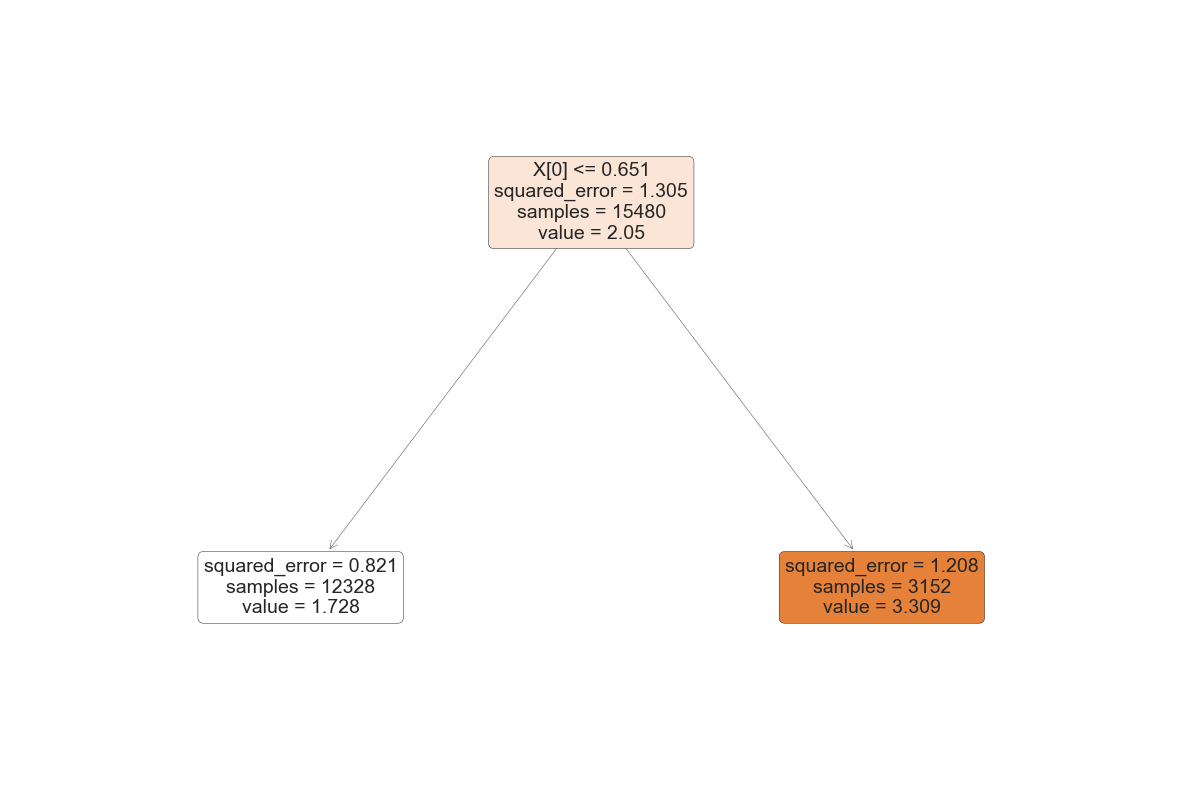

In [50]:
plt.figure(figsize=(15,10))
tree.plot_tree(DT2,filled=True, 
               rounded=True,fontsize=14);

### Errors

In [23]:
print("Mean Squared Error for DT2 is:",metrics.mean_squared_error(y_test, DT2.predict(X_test)))
print("Mean Absolute Error for DT2 is:",metrics.mean_absolute_error(y_test, DT2.predict(X_test)))
print("Root Mean Squared Error for DT2 is:",sqrt(metrics.mean_squared_error(y_test, DT2.predict(X_test))))


Mean Squared Error for DT2 is: 0.9774029475814726
Mean Absolute Error for DT2 is: 0.7649305934498826
Root Mean Squared Error for DT2 is: 0.9886369139281987


### Error Plots: Predicted vs Actual

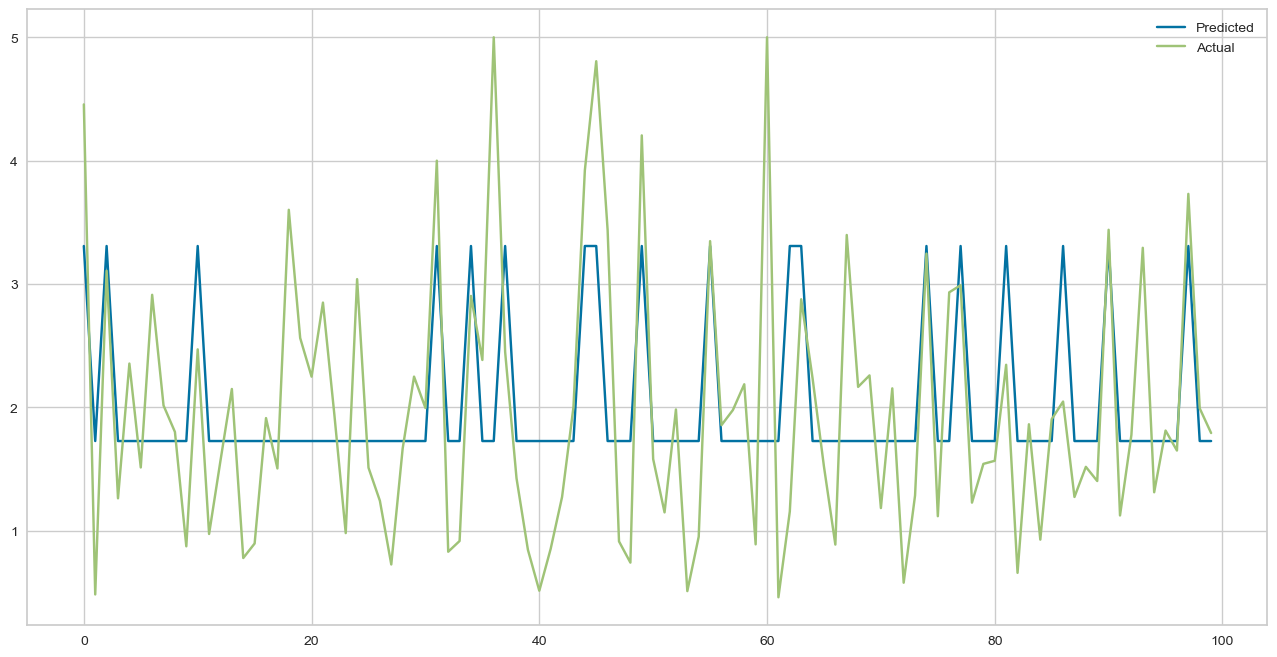

In [24]:
error=abs(y_predicted_DT2-y_test)
errors_data = pd.DataFrame({'Predicted':y_predicted_DT2,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
errors_data = errors_data.reset_index()
errors_data = errors_data.drop(['index'],axis=1)
plt.plot(errors_data[:100])
plt.legend(['Predicted','Actual'])

In [25]:
score1 = DT2.score(X_train, y_train)
score2 = DT2.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(score1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(score2))

R² of Decision Tree Regressor on training set: 0.310
R² of Decision Tree Regressor on test set: 0.305


# Grid Search to find best parameters

In [36]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2,20)),'min_samples_split': [2, 3, 4],'max_depth' : [1,3,5,12],'min_samples_leaf':[1,2,5]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [37]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=14, min_samples_leaf=2,
                      random_state=42)

In [38]:
grid_search_cv.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

### Model Using best parameters

In [39]:
DT_best = DecisionTreeRegressor(random_state=42,max_leaf_nodes=14,min_samples_split=2,min_samples_leaf=2,max_depth=5)
DT_best.fit(X_train, y_train)
y_predicted_DT_best = DT_best.predict(X_test)

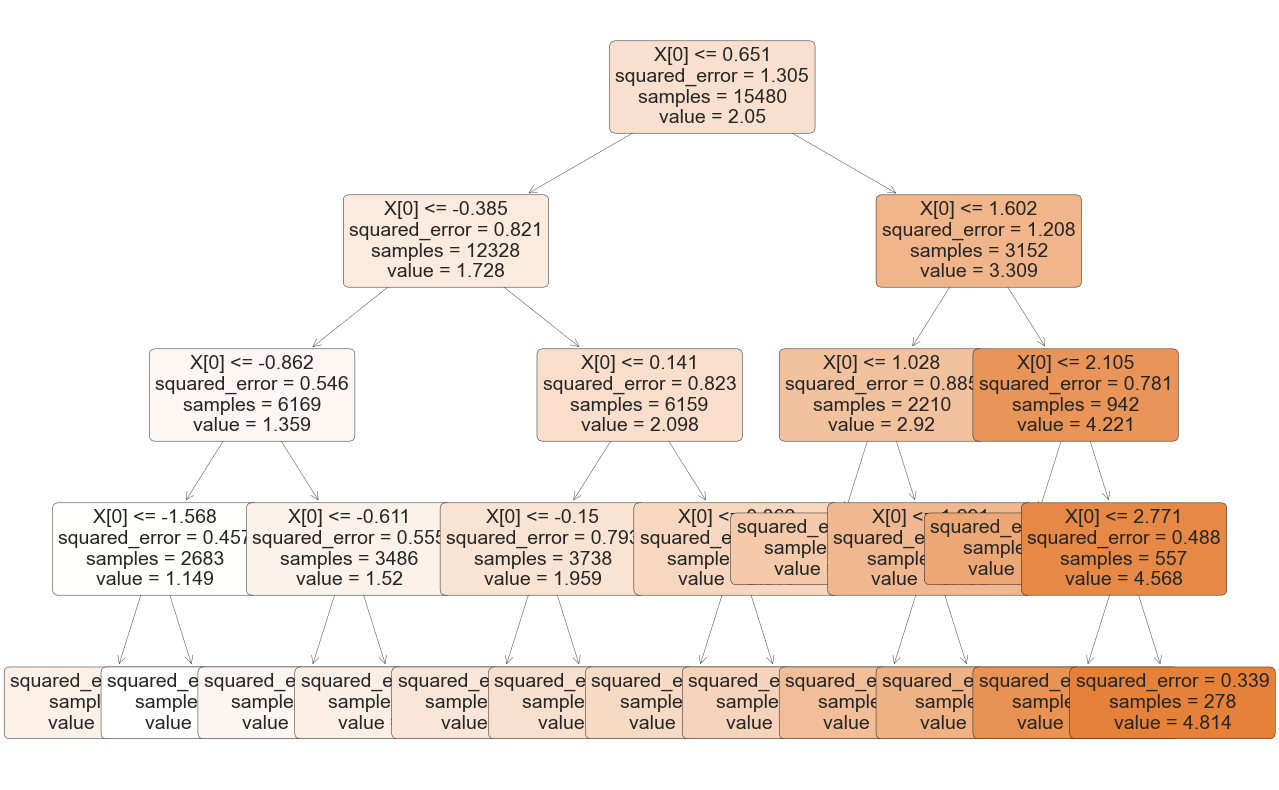

In [46]:
plt.figure(figsize=(15,10))

tree.plot_tree(DT_best,
               filled=True, 
               rounded=True,
               fontsize=14);

### Errors for best parameters

In [40]:
print("Mean Squared Error for best model is:",metrics.mean_squared_error(y_test, DT_best.predict(X_test)))
print("Mean Absolute Error for best model is:",metrics.mean_absolute_error(y_test, DT_best.predict(X_test)))
print("Root Mean Squared Error for best model is:",sqrt(metrics.mean_squared_error(y_test, DT_best.predict(X_test))))

Mean Squared Error for best model is: 0.7293989045102894
Mean Absolute Error for best model is: 0.6348988661317965
Root Mean Squared Error for best model is: 0.854048537561121


### Error Plot for model with best parameters: Predicted vs Actual

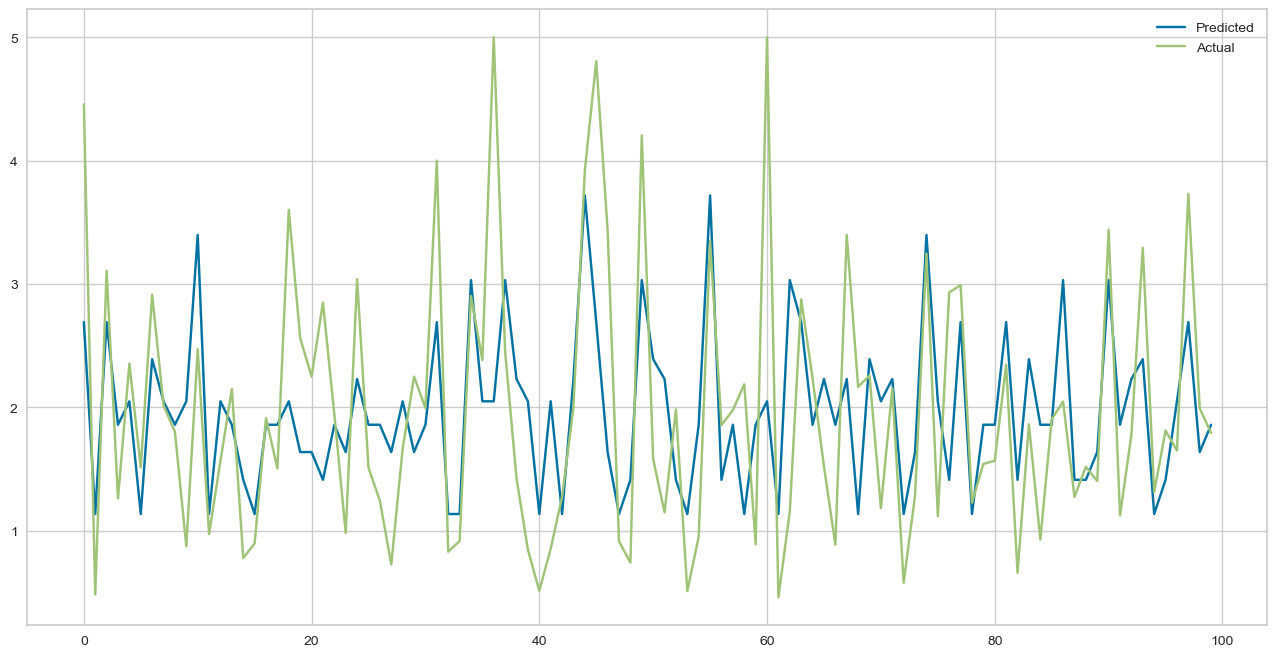

In [41]:
error=abs(y_predicted_DT_best-y_test)
errors_data = pd.DataFrame({'Predicted':y_predicted_DT_best,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
errors_data = errors_data.reset_index()
errors_data = errors_data.drop(['index'],axis=1)
plt.plot(errors_data[:100])
plt.legend(['Predicted','Actual'])

In [42]:
score1 = DT_best.score(X_train, y_train)
score2 = DT_best.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(score1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(score2))


R² of Decision Tree Regressor on training set: 0.492
R² of Decision Tree Regressor on test set: 0.482


## Predicting Med House Value for our Best Model

In [43]:
x=df[['MedInc']]
predicted_ans= DT_best.predict(x)
print("The Predicted Med House Value is",predicted_ans[:10])

The Predicted Med House Value is [4.81419885 4.81419885 4.81419885 4.81419885 4.81419885 4.81419885
 4.81419885 4.81419885 3.7188173  4.81419885]


# Best Feature selection

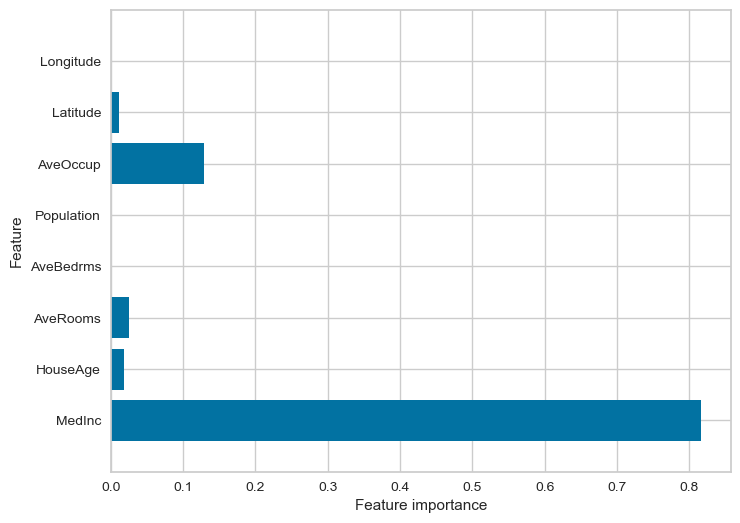

In [44]:
# Selecting all features for Model
features=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']]
# Splitting data to test and train parts
X_train_, X_test_,y_train_, y_test_ = train_test_split(features,y ,random_state=104, test_size=0.25, shuffle=True)
# DecisionTreeRegressor
DT3 = DecisionTreeRegressor(random_state=42,criterion='squared_error',max_leaf_nodes=14,min_samples_split=2)
DT3.fit(X_train_, y_train_)
# Prediciting values for Model 
y_predicted_DT3 = DT3.predict(X_test_)

#Plotting Importance of Features
def plot_feature_imp(model):
  plt.figure(figsize=(8,6))
  num_of_features = 8
  plt.barh(range(num_of_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(num_of_features), features)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, num_of_features)
  
  #plt.savefig("feature_importance")
plot_feature_imp(DT3)


In [45]:
print("Feature importances:\n{0}".format(DT3.feature_importances_))

Feature importances:
[0.81672691 0.01896401 0.02523579 0.         0.         0.12834493
 0.01072836 0.        ]


### The selected feature is Med Income as it is a the most reliable one to predict Med House Value